In [3]:
execfile('setting.py')

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_raw=pd.read_csv("/home/piai/Downloads/css.csv")
df_raw.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,...,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX
0,0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,...,small,sightseeing,other,consignment,0,10,19.50,1.950,1,0
1,1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,...,small,sightseeing,other,consignment,0,10,20.80,2.080,3,0
2,2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
3,3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
4,4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,...,big,metro,east,consignment,0,2,4.16,0.416,2,0
5,5,5,5,559336,22386,JUMBO BAG PINK POLKADOT,2,2021-07-07,2.08,E17315,...,big,metro,east,consignment,0,2,4.16,0.416,3,0
6,6,6,6,546249,22386,JUMBO BAG PINK POLKADOT,6,2021-03-10,1.95,E14606,...,middle,sightseeing,west,consignment,0,6,11.70,1.170,1,0
7,7,7,7,551194,22386,JUMBO BAG PINK POLKADOT,1,2021-04-27,2.08,E14606,...,middle,sightseeing,west,consignment,0,1,2.08,0.208,2,0
8,8,8,8,556887,22386,JUMBO BAG PINK POLKADOT,2,2021-06-15,2.08,E14606,...,middle,sightseeing,west,consignment,0,2,4.16,0.416,2,0
9,9,9,9,557577,22386,JUMBO BAG PINK POLKADOT,2,2021-06-21,2.08,E14606,...,middle,sightseeing,west,consignment,0,2,4.16,0.416,2,0


In [7]:
df_raw2=pd.read_csv("/home/piai/Downloads/카테고리123.csv")
df_raw2.head()

,index,Unnamed: 1,customer_id,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,real_quantity,Unnamed: 11,category,Detailed
0,0,14,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,Household Appliances,Others
1,1,81,E12748,Phoenix,AZ,1759,1341,middle,other,west,2382,REX CASH+CARRY JUMBO SHOPPER,"Bags, Luggage & Accessories",Others
2,2,6,E14606,San Diego,CA,1429,844,middle,sightseeing,west,2155,HANGING HEART MIRROR DECORATION,Home & Garden,Others
3,3,48,E15311,Houston,TX,2325,1658,middle,other,south,1939,EDWARDIAN PARASOL NATURAL,Home & Garden,Others
4,4,197,E15005,Miami,FL,483,93,small,sightseeing,south,1840,CHARLOTTE BAG PINK POLKADOT,"Bags, Luggage & Accessories",Others


In [8]:
df_raw2.shape

(3458, 14)

In [9]:
df_raw.shape

(276787, 25)

In [10]:
dfdf=df_raw.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','invoice','product_code','customer_id'],axis=1,inplace=False)
dfdf.columns

Index(['product_name', 'quantity', 'date', 'unit_price', 'sales', 'city',
       'state', 'pop_thousand', 'land_sq_meter', 'pop_size', 'city_type',
       'city_lctn', 'stock_type', 'QuantityCanceled', 'real_quantity',
       'real_sales', 'margin', 'quarter', 'Refund_OX'],
      dtype='object')

In [11]:
dfdf2=df_raw2.drop(['index'],axis=1,inplace=False)

In [12]:
dfdf2.columns

Index(['Unnamed: 1', 'customer_id', 'city', 'state', 'pop_thousand',
       'land_sq_meter', 'pop_size', 'city_type', 'city_lctn', 'real_quantity',
       'Unnamed: 11', 'category', 'Detailed'],
      dtype='object')

In [13]:
dfdf['customer_id']=df_raw['customer_id']
dfdf.columns

Index(['product_name', 'quantity', 'date', 'unit_price', 'sales', 'city',
       'state', 'pop_thousand', 'land_sq_meter', 'pop_size', 'city_type',
       'city_lctn', 'stock_type', 'QuantityCanceled', 'real_quantity',
       'real_sales', 'margin', 'quarter', 'Refund_OX', 'customer_id'],
      dtype='object')

In [14]:
df_raw2.shape

(3458, 14)

In [15]:
df=pd.merge(df_raw2,df_raw,on='customer_id',how='left')
df.shape

(276829, 38)

In [16]:
df.columns

Index(['index', 'Unnamed: 1', 'customer_id', 'city_x', 'state_x',
       'pop_thousand_x', 'land_sq_meter_x', 'pop_size_x', 'city_type_x',
       'city_lctn_x', 'real_quantity_x', 'Unnamed: 11', 'category', 'Detailed',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'invoice', 'product_code',
       'product_name', 'quantity', 'date', 'unit_price', 'sales', 'city_y',
       'state_y', 'pop_thousand_y', 'land_sq_meter_y', 'pop_size_y',
       'city_type_y', 'city_lctn_y', 'stock_type', 'QuantityCanceled',
       'real_quantity_y', 'real_sales', 'margin', 'quarter', 'Refund_OX'],
      dtype='object')

In [17]:
df.drop(['index','Unnamed: 1', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0','city_y',
       'state_y','pop_thousand_y', 'land_sq_meter_y', 'pop_size_y',
       'city_type_y', 'city_lctn_y','real_quantity_y'],axis=1,inplace=True)
df.columns

Index(['customer_id', 'city_x', 'state_x', 'pop_thousand_x', 'land_sq_meter_x',
       'pop_size_x', 'city_type_x', 'city_lctn_x', 'real_quantity_x',
       'Unnamed: 11', 'category', 'Detailed', 'invoice', 'product_code',
       'product_name', 'quantity', 'date', 'unit_price', 'sales', 'stock_type',
       'QuantityCanceled', 'real_sales', 'margin', 'quarter', 'Refund_OX'],
      dtype='object')

In [18]:
df['category'].nunique()

28

In [19]:
df.head()

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type_x,city_lctn_x,real_quantity_x,Unnamed: 11,...,quantity,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX
0,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-05-23,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0
1,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-05-31,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0
2,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2.0,2021-07-27,2.08,4.16,consignment,0.0,4.16,0.416,3.0,0.0
3,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-07-29,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0
4,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-08-03,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0


In [20]:
df_customer=df.groupby('customer_id')['product_name'].unique()
df_customer

customer_id
E12346                     [MEDIUM CERAMIC TOP STORAGE JAR]
E12747    [JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...
E12748    [JUMBO BAG PINK POLKADOT, RED RETROSPOT WRAP, ...
E12749    [RECIPE BOX RETROSPOT, JAM MAKING SET WITH JAR...
E12820    [WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG...
                                ...                        
E18280    [ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B...
E18281    [LUNCH BAG DOILEY PATTERN, GUMBALL COAT RACK, ...
E18282    [ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...
E18283    [JUMBO BAG PINK POLKADOT, RECYCLING BAG RETROS...
E18287    [CERAMIC CHERRY CAKE MONEY BANK, PACK OF 6 HAN...
Name: product_name, Length: 3458, dtype: object

In [21]:
df_customer.head(30)

customer_id
E12346                     [MEDIUM CERAMIC TOP STORAGE JAR]
E12747    [JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...
E12748    [JUMBO BAG PINK POLKADOT, RED RETROSPOT WRAP, ...
E12749    [RECIPE BOX RETROSPOT, JAM MAKING SET WITH JAR...
E12820    [WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG...
E12821    [HEART DECORATION WITH PEARLS, HEART DECORATIO...
E12822    [JUMBO BAG PINK POLKADOT, JUMBO BAG VINTAGE LE...
E12823                                 [DOORMAT UNION FLAG]
E12826    [BLUE POLKADOT WRAP, RED RETROSPOT WRAP, LUNCH...
E12827    [PACK OF 20 NAPKINS PANTRY DESIGN, HANGING HEA...
E12828    [PACK OF 6 HANDBAG GIFT BOXES, BISCUIT TIN VIN...
E12829    [SWEETHEART RECIPE BOOK STAND, DANISH ROSE BED...
E12830    [TRADITIONAL WOODEN SKIPPING ROPE, GROW A FLYT...
E12831    [HANGING HEART ZINC T-LIGHT HOLDER, SINGLE HEA...
E12832    [DOORSTOP RETROSPOT HEART, SWEETHEART CERAMIC ...
E12833    [NATURAL SLATE HEART CHALKBOARD, ASSORTED COLO...
E12834    [DOORMAT HEARTS, D

In [22]:
df['product_name'].nunique()

3702

In [23]:
df_customer=pd.DataFrame(df_customer)
df_customer.head()

,product_name
customer_id,
E12346,[MEDIUM CERAMIC TOP STORAGE JAR]
E12747,"[JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
E12748,"[JUMBO BAG PINK POLKADOT, RED RETROSPOT WRAP, ..."
E12749,"[RECIPE BOX RETROSPOT, JAM MAKING SET WITH JAR..."
E12820,"[WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG..."


In [22]:
list_association=[]
for i in df_customer['product_name']:
    tmp_list=list(set(i))
    tmp_list.sort()
    
    list_association.append(tmp_list)

In [23]:
len(list_association)

3458

In [24]:
def listlength (x):
    while len(x)<1285:
        x.append(0)
    return x

In [25]:
lis_a=[]
listlength(lis_a)
len(lis_a)

1285

In [95]:
df['Unnamed: 11']

0                             CHILLI LIGHTS
1                             CHILLI LIGHTS
2                             CHILLI LIGHTS
3                             CHILLI LIGHTS
4                             CHILLI LIGHTS
                        ...                
276824    ASSORTED LAQUERED INCENSE HOLDERS
276825                               Manual
276826                               Manual
276827           PICNIC BASKET WICKER SMALL
276828                               Manual
Name: Unnamed: 11, Length: 276829, dtype: object

In [93]:
df[df['product_name']=='6 GIFT TAGS VINTAGE CHRISTMAS']

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type_x,city_lctn_x,real_quantity_x,Unnamed: 11,...,quantity,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX
7865,E12748,Phoenix,AZ,1759,1341,middle,other,west,2382,REX CASH+CARRY JUMBO SHOPPER,...,3.0,2021-10-05,0.83,2.49,consignment,0.0,2.49,0.249,4.0,0.0
27416,E15358,New York,NY,8177,778,big,metro,east,975,6 RIBBONS RUSTIC CHARM,...,12.0,2021-09-12,0.83,9.96,consignment,0.0,9.96,0.996,3.0,0.0
27417,E15358,New York,NY,8177,778,big,metro,east,975,6 RIBBONS RUSTIC CHARM,...,12.0,2021-12-24,0.83,9.96,consignment,0.0,9.96,0.996,4.0,0.0
32075,E17139,Las Vegas,NV,675,367,small,sightseeing,west,917,LUNCH BAG BLACK SKULL.,...,12.0,2021-09-12,0.83,9.96,consignment,0.0,9.96,0.996,3.0,0.0
32076,E17139,Las Vegas,NV,675,367,small,sightseeing,west,917,LUNCH BAG BLACK SKULL.,...,12.0,2021-11-15,0.83,9.96,consignment,0.0,9.96,0.996,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262793,E13359,New York,NY,8177,778,big,metro,east,23,6 GIFT TAGS 50'S CHRISTMAS,...,12.0,2021-10-07,0.83,9.96,consignment,0.0,9.96,0.996,4.0,0.0
263273,E14894,New York,NY,8177,778,big,metro,east,23,6 GIFT TAGS VINTAGE CHRISTMAS,...,12.0,2021-09-15,0.83,9.96,consignment,0.0,9.96,0.996,3.0,0.0
264268,E16758,Miami,FL,483,93,small,sightseeing,south,22,3 TIER CAKE TIN GREEN AND CREAM,...,36.0,2021-10-05,0.83,29.88,consignment,0.0,29.88,2.988,4.0,0.0
266243,E13203,Las Vegas,NV,675,367,small,sightseeing,west,20,12 PENCILS TALL TUBE POSY,...,12.0,2021-08-11,0.83,9.96,consignment,0.0,9.96,0.996,3.0,0.0


In [26]:
df_list_association=pd.DataFrame(list_association)

In [27]:
df_list_association.shape

(3458, 1285)

In [28]:
df_list_association.head()

,0,1,2,3,4,5,6,7,8,9,...,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284
0,MEDIUM CERAMIC TOP STORAGE JAR,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,ASSORTED COLOUR BIRD ORNAMENT,DOORMAT BLACK FLOCK,DOORMAT HEARTS,DOORMAT UNION FLAG,ENAMEL BREAD BIN CREAM,ENAMEL COLANDER CREAM,ENAMEL FLOWER JUG CREAM,ENAMEL MEASURING JUG CREAM,ENAMEL WATERING CAN CREAM,GAOLERS KEYS DECORATIVE GARDEN,...,None,None,None,None,None,None,None,None,None,None
2,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC T-LIGHT HOLDER STARS SMALL
3,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 TRADITIONAl BISCUIT CUTTERS SET,6 RIBBONS RUSTIC CHARM,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,APOTHECARY MEASURING JAR,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,...,None,None,None,None,None,None,None,None,None,None
4,60 CAKE CASES VINTAGE CHRISTMAS,72 SWEETHEART FAIRY CAKE CASES,ANTIQUE SILVER T-LIGHT GLASS,CANDLEHOLDER PINK HANGING HEART,CARDHOLDER HOLLY WREATH METAL,CHRISTMAS RETROSPOT STAR WOOD,CHRISTMAS TOILET ROLL,EMBROIDERED RIBBON REEL SUSIE,JUMBO BAG ALPHABET,JUMBO BAG PINK VINTAGE PAISLEY,...,None,None,None,None,None,None,None,None,None,None


In [48]:
df_list_association.shape

(3458, 1285)

In [29]:
df_list_association.describe()

,0,1,2,3,4,5,6,7,8,9,...,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284
count,3416,3332,3277,3228,3184,3125,3060,3002,2930,2861,...,1,1,1,1,1,1,1,1,1,1
unique,600,814,958,1058,1132,1192,1199,1265,1242,1249,...,1,1,1,1,1,1,1,1,1,1
top,10 COLOUR SPACEBOY PEN,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR BIRD ORNAMENT,ALARM CLOCK BAKELIKE RED,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC T-LIGHT HOLDER STARS SMALL
freq,103,80,65,56,44,29,30,27,21,18,...,1,1,1,1,1,1,1,1,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

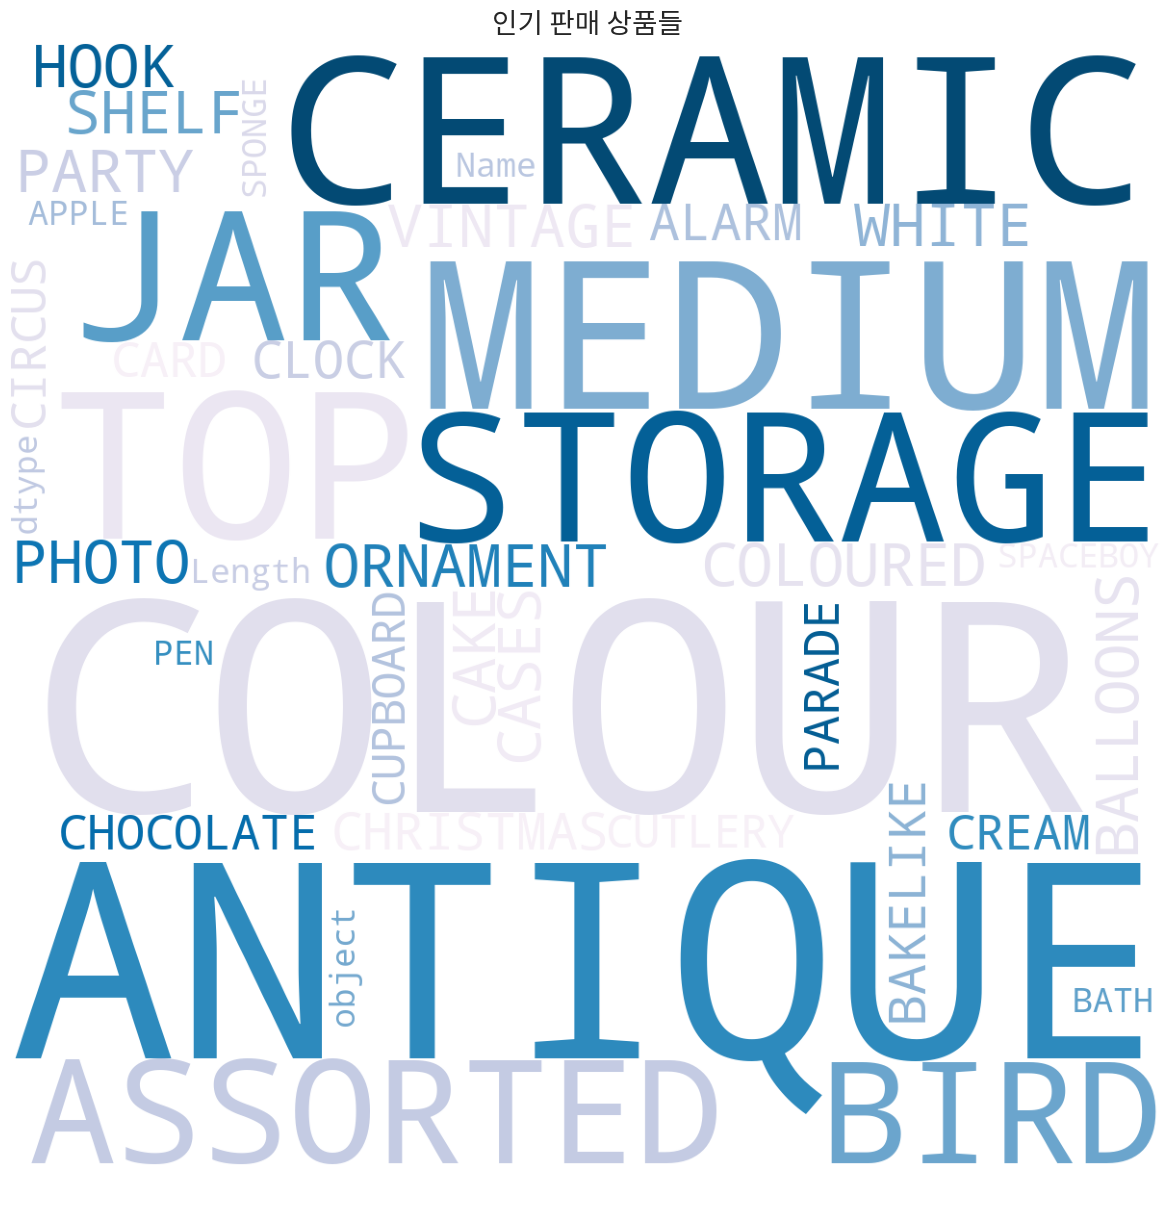

In [43]:
plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='white',colormap = 'PuBu',width=1200,height=1200,max_words=121).generate(str(df_list_association[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('인기 판매 상품들',fontsize=20)
plt.show

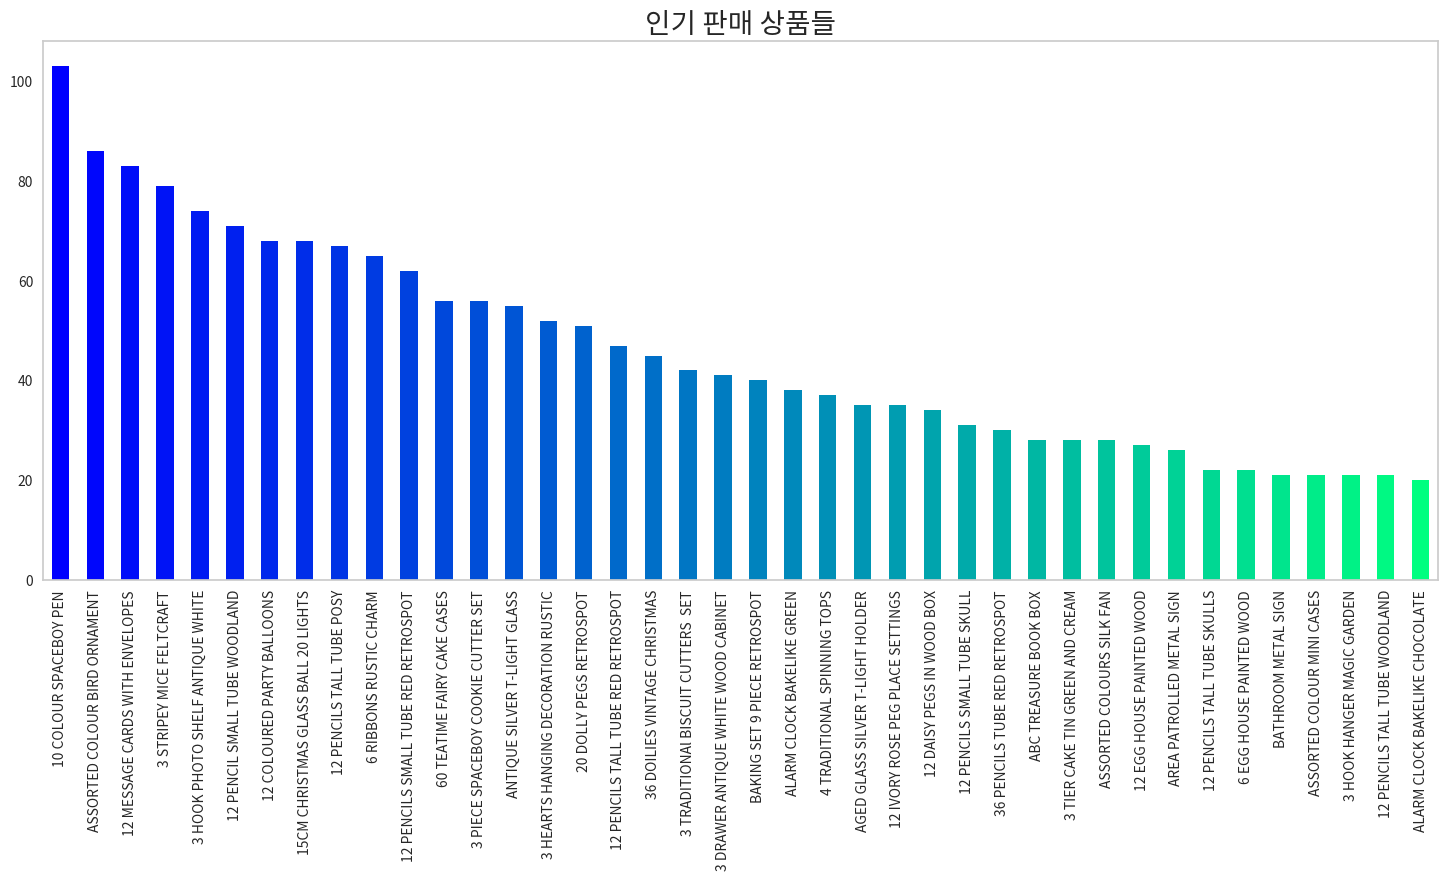

In [47]:
plt.rcParams['figure.figsize']=(18,7)
color=plt.cm.winter(np.linspace(0,1,40))
df_list_association[0].value_counts().head(40).plot.bar(color=color)
plt.title('인기 판매 상품들',fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [88]:
trans=[]
for i in range(0,3458):
    trans.append([str(df_list_association.values[i,j]) for j in range(0,1285)])

trans=np.array(trans)
print(trans.shape)

(3458, 1285)


In [89]:
len(list_association[2])

1285

In [51]:
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
data=te.fit_transform(trans)
data=pd.DataFrame(data,columns=te.columns_)

data.shape

(3458, 3704)

In [90]:
data

,10 COLOUR SPACEBOY PEN,ASSORTED COLOUR BIRD ORNAMENT,12 MESSAGE CARDS WITH ENVELOPES,3 STRIPEY MICE FELTCRAFT,3 HOOK PHOTO SHELF ANTIQUE WHITE,12 PENCIL SMALL TUBE WOODLAND,12 COLOURED PARTY BALLOONS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12 PENCILS TALL TUBE POSY,6 RIBBONS RUSTIC CHARM,...,ANTIQUE SILVER TEA GLASS ENGRAVED,3 RAFFIA RIBBONS 50'S CHRISTMAS,36 FOIL HEART CAKE CASES,3 TIER CAKE TIN RED AND CREAM,16 PIECE CUTLERY SET PANTRY DESIGN,6 RIBBONS EMPIRE,3 TIER SWEETHEART GARDEN SHELF,200 RED + WHITE BENDY STRAWS,72 SWEETHEART FAIRY CAKE CASES,60 CAKE CASES DOLLY GIRL DESIGN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,True,False,True,False,True,True,...,False,False,False,True,True,False,False,True,True,True
3,False,True,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3456,True,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [91]:
len(y.index)

100

In [72]:
str(df_list_association.values[0,0])

'MEDIUM CERAMIC TOP STORAGE JAR'

In [52]:
data.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,True,False,True,True,...,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
y = df_list_association[0].value_counts().head(100).to_frame()
y.index

Index(['10 COLOUR SPACEBOY PEN', 'ASSORTED COLOUR BIRD ORNAMENT',
       '12 MESSAGE CARDS WITH ENVELOPES', '3 STRIPEY MICE FELTCRAFT',
       '3 HOOK PHOTO SHELF ANTIQUE WHITE', '12 PENCIL SMALL TUBE WOODLAND',
       '12 COLOURED PARTY BALLOONS', '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
       '12 PENCILS TALL TUBE POSY', '6 RIBBONS RUSTIC CHARM',
       '12 PENCILS SMALL TUBE RED RETROSPOT', '60 TEATIME FAIRY CAKE CASES',
       '3 PIECE SPACEBOY COOKIE CUTTER SET', 'ANTIQUE SILVER T-LIGHT GLASS',
       '3 HEARTS HANGING DECORATION RUSTIC', '20 DOLLY PEGS RETROSPOT',
       '12 PENCILS TALL TUBE RED RETROSPOT', '36 DOILIES VINTAGE CHRISTMAS',
       '3 TRADITIONAl BISCUIT CUTTERS  SET',
       '3 DRAWER ANTIQUE WHITE WOOD CABINET', 'BAKING SET 9 PIECE RETROSPOT',
       'ALARM CLOCK BAKELIKE GREEN', '4 TRADITIONAL SPINNING TOPS',
       'AGED GLASS SILVER T-LIGHT HOLDER', '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 DAISY PEGS IN WOOD BOX', '12 PENCILS SMALL TUBE SKULL',
       '36

In [92]:
data=data[y.index]

KeyError: '[\'ALUMINIUM STAMPED HEART\', \'ANTIQUE GLASS PEDESTAL BOWL\', \'60 CAKE CASES VINTAGE CHRISTMAS\', \'36 DOILIES DOLLY GIRL\', "6 GIFT TAGS 50\'S CHRISTMAS", \'JUMBO  BAG BAROQUE BLACK WHITE\', \'BLUE HAPPY BIRTHDAY BUNTING\', \'4 IVORY DINNER CANDLES SILVER FLOCK\', \'BLACK RECORD COVER FRAME\', \'ASSORTED FLOWER COLOUR "LEIS"\', \'CHOCOLATE HOT WATER BOTTLE\', \'GREEN REGENCY TEACUP AND SAUCER\', \'6 ROCKET BALLOONS\', \'3 GARDENIA MORRIS BOXED CANDLES\', \'BLACK HEART CARD HOLDER\', \'3 ROSE MORRIS BOXED CANDLES\', \'ANTIQUE SILVER TEA GLASS ETCHED\', \'ANTIQUE GLASS DRESSING TABLE POT\', \'6 GIFT TAGS VINTAGE CHRISTMAS\', \'ASSORTED BOTTLE TOP  MAGNETS\', \'BAG 125g SWIRLY MARBLES\', \'AIRLINE LOUNGE,METAL SIGN\', \'COLOUR GLASS T-LIGHT HOLDER HANGING\', \'BOX OF VINTAGE ALPHABET BLOCKS\', \'3 WHITE CHOC MORRIS BOXED CANDLES\', \'18PC WOODEN CUTLERY SET DISPOSABLE\', \'36 PENCILS TUBE SKULLS\', \'AIRLINE BAG VINTAGE TOKYO 78\', "50\'S CHRISTMAS GIFT BAG LARGE", \'ALARM CLOCK BAKELIKE RED\', \'CANDLEHOLDER PINK HANGING HEART\', \'BLUE GIANT GARDEN THERMOMETER\', \'BINGO SET\', \'CHILLI LIGHTS\', \'ALARM CLOCK BAKELIKE IVORY\', \'4 PEAR BOTANICAL DINNER CANDLES\', \'ALPHABET STENCIL CRAFT\', \'6 CHOCOLATE LOVE HEART T-LIGHTS\', \'APRON MODERN VINTAGE COTTON\', \'BATH BUILDING BLOCK WORD\', \'BOYS VINTAGE TIN SEASIDE BUCKET\', \'3D DOG PICTURE PLAYING CARDS\', \'ADVENT CALENDAR GINGHAM SACK\', \'DOORMAT KEEP CALM AND COME IN\', \'200 BENDY SKULL STRAWS\', \'6 RIBBONS ELEGANT CHRISTMAS\', \'BLACK/BLUE POLKADOT UMBRELLA\', \'JUMBO BAG RED RETROSPOT\', \'BLUE DINER WALL CLOCK\', \'ASS FLORAL PRINT MULTI SCREWDRIVER\'] not in index'

In [61]:
frequent_itemsets=apriori(data,min_support=0.01,use_colnames=True)
frequent_itemsets.sort_values("support",ascending=False)

,support,itemsets
1,0.150954,(ASSORTED COLOUR BIRD ORNAMENT)
20,0.108733,(BAKING SET 9 PIECE RETROSPOT)
11,0.093696,(60 TEATIME FAIRY CAKE CASES)
9,0.085888,(6 RIBBONS RUSTIC CHARM)
46,0.071718,(72 SWEETHEART FAIRY CAKE CASES)
...,...,...
65,0.010411,"(BAKING SET 9 PIECE RETROSPOT, 3 STRIPEY MICE ..."
94,0.010121,"(BAKING SET 9 PIECE RETROSPOT, 12 PENCILS TALL..."
108,0.010121,"(60 TEATIME FAIRY CAKE CASES, 72 SWEETHEART FA..."
73,0.010121,"(6 RIBBONS RUSTIC CHARM, ALARM CLOCK BAKELIKE ..."


In [62]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.029786,(10 COLOUR SPACEBOY PEN),1
1,0.150954,(ASSORTED COLOUR BIRD ORNAMENT),1
2,0.030364,(12 MESSAGE CARDS WITH ENVELOPES),1
3,0.057259,(3 STRIPEY MICE FELTCRAFT),1
4,0.041932,(3 HOOK PHOTO SHELF ANTIQUE WHITE),1
...,...,...,...
107,0.021110,"(60 CAKE CASES DOLLY GIRL DESIGN, 72 SWEETHEAR...",2
108,0.010121,"(60 TEATIME FAIRY CAKE CASES, 72 SWEETHEART FA...",3
109,0.010989,"(12 PENCILS SMALL TUBE SKULL, 12 PENCILS SMALL...",3
110,0.010700,"(BAKING SET 9 PIECE RETROSPOT, 60 TEATIME FAIR...",3


In [63]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
108,0.010121,"(60 TEATIME FAIRY CAKE CASES, 72 SWEETHEART FA...",3
109,0.010989,"(12 PENCILS SMALL TUBE SKULL, 12 PENCILS SMALL...",3
110,0.010700,"(BAKING SET 9 PIECE RETROSPOT, 60 TEATIME FAIR...",3
111,0.017351,"(60 CAKE CASES DOLLY GIRL DESIGN, 60 TEATIME F...",3


In [64]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
48,0.015616,"(3 STRIPEY MICE FELTCRAFT, ASSORTED COLOUR BIR...",2
49,0.013881,"(3 HOOK PHOTO SHELF ANTIQUE WHITE, ASSORTED CO...",2
50,0.023135,"(6 RIBBONS RUSTIC CHARM, ASSORTED COLOUR BIRD ...",2
51,0.021400,"(60 TEATIME FAIRY CAKE CASES, ASSORTED COLOUR ...",2
52,0.025159,"(ANTIQUE SILVER T-LIGHT GLASS, ASSORTED COLOUR...",2
53,0.010121,"(3 HEARTS HANGING DECORATION RUSTIC, ASSORTED ...",2
54,0.021689,"(BAKING SET 9 PIECE RETROSPOT, ASSORTED COLOUR...",2
55,0.017929,"(ALARM CLOCK BAKELIKE GREEN, ASSORTED COLOUR B...",2
56,0.010989,"(ASSORTED COLOUR BIRD ORNAMENT, 4 TRADITIONAL ...",2
57,0.010700,"(AGED GLASS SILVER T-LIGHT HOLDER, ASSORTED CO...",2


In [65]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.1) ]

,support,itemsets,length
1,0.150954,(ASSORTED COLOUR BIRD ORNAMENT),1
20,0.108733,(BAKING SET 9 PIECE RETROSPOT),1


In [66]:
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.1)
df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
127,"(60 CAKE CASES DOLLY GIRL DESIGN, 72 SWEETHEAR...",(60 TEATIME FAIRY CAKE CASES),0.021110,0.093696,0.017351,0.821918,8.772197,0.015373,5.089247
99,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.031810,0.062175,0.025448,0.800000,12.866977,0.023470,4.689127
122,"(BAKING SET 9 PIECE RETROSPOT, 72 SWEETHEART F...",(60 TEATIME FAIRY CAKE CASES),0.015038,0.093696,0.010700,0.711538,7.594136,0.009291,3.141855
116,"(12 PENCILS SMALL TUBE SKULL, 12 PENCIL SMALL ...",(12 PENCILS SMALL TUBE RED RETROSPOT),0.015616,0.039618,0.010989,0.703704,17.762098,0.010370,3.241288
117,"(12 PENCILS SMALL TUBE RED RETROSPOT, 12 PENCI...",(12 PENCILS SMALL TUBE SKULL),0.015616,0.039329,0.010989,0.703704,17.892702,0.010375,3.242264
...,...,...,...,...,...,...,...,...,...
75,(BAKING SET 9 PIECE RETROSPOT),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.108733,0.041643,0.011857,0.109043,2.618536,0.007329,1.075649
113,(60 TEATIME FAIRY CAKE CASES),"(72 SWEETHEART FAIRY CAKE CASES, ASSORTED COLO...",0.093696,0.017062,0.010121,0.108025,6.331345,0.008523,1.101979
79,(BAKING SET 9 PIECE RETROSPOT),(ANTIQUE SILVER T-LIGHT GLASS),0.108733,0.071139,0.011567,0.106383,1.495416,0.003832,1.039439
1,(ASSORTED COLOUR BIRD ORNAMENT),(3 STRIPEY MICE FELTCRAFT),0.150954,0.057259,0.015616,0.103448,1.806688,0.006973,1.051519


In [ ]:
df_ar[af_ar['antecedents']=='']

In [ ]:
df_asso=pd.DataFrame(df_raw_enc,columns=enc.columns_)
df_asso.head()

In [ ]:
v_min_support=0.1

df_freq=apriori(df_asso, min_support=v_min_support,use_colnames=True)

df_freq[9:16].round()

In [ ]:
df_asso_rule=association_rules(df_freq,metric="confidence",min_threshold=0.1)
df_asso_rule.round(3)

df_asso_rule=association_rules(df_freq,metric='lift',min_threshold=0.0)
df_asso_rule.round(3)

In [1]:
df.head()

NameError: name 'df' is not defined

In [2]:
df.rename(columns={'city_x':'city','state_x':'state','pop_thousand_x':'pop_thousand','land_sq_meter_x':'land_sq_meter','pop_size_x':'pop_size'},inplace=True)
df.columns

NameError: name 'df' is not defined

In [24]:
df.rename(columns={'city_type_x':'city_type','city_lctn_x':'city_lctn','real_quantity_x':'real_quantity'},inplace=True)
df.columns

Index(['customer_id', 'city_x', 'state_x', 'pop_thousand_x', 'land_sq_meter_x',
       'pop_size_x', 'city_type', 'city_lctn', 'real_quantity', 'Unnamed: 11',
       'category', 'Detailed', 'invoice', 'product_code', 'product_name',
       'quantity', 'date', 'unit_price', 'sales', 'stock_type',
       'QuantityCanceled', 'real_sales', 'margin', 'quarter', 'Refund_OX'],
      dtype='object')

In [25]:
df.head()

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type,city_lctn,real_quantity,Unnamed: 11,...,quantity,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX
0,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-05-23,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0
1,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-05-31,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0
2,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2.0,2021-07-27,2.08,4.16,consignment,0.0,4.16,0.416,3.0,0.0
3,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-07-29,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0
4,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,1.0,2021-08-03,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0


In [26]:
df['date']=df['date'].astype('datetime64[ns]')

In [27]:
df['month']=df['date'].dt.month
df.head()

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type,city_lctn,real_quantity,Unnamed: 11,...,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX,month
0,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-23,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
1,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-31,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
2,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-27,2.08,4.16,consignment,0.0,4.16,0.416,3.0,0.0,7.0
3,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-29,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,7.0
4,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-08-03,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,8.0


In [28]:
df_month=df.groupby('month')['sales'].sum()

In [29]:
df_month

month
1.0     440876.330
2.0     354618.200
3.0     465784.190
4.0     408733.111
5.0     550359.350
6.0     523775.590
7.0     484545.591
8.0     497194.910
9.0     794802.792
10.0    430249.660
11.0    448431.120
12.0    629994.510
Name: sales, dtype: float64

In [30]:
df_month=df.groupby('month')['real_sales'].sum()

In [31]:
df_month

month
1.0     354986.690
2.0     348983.200
3.0     455670.230
4.0     381776.611
5.0     530904.550
6.0     472201.320
7.0     472778.271
8.0     482180.160
9.0     787559.982
10.0    423378.060
11.0    444126.690
12.0    460812.820
Name: real_sales, dtype: float64

In [32]:
df_consi=df[df['stock_type']=='consignment']
df_consi

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type,city_lctn,real_quantity,Unnamed: 11,...,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX,month
0,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-23,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
1,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-31,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
2,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-27,2.08,4.16,consignment,0.0,4.16,0.416,3.0,0.0,7.0
3,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-29,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,7.0
4,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-08-03,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276821,E15313,Los Angeles,CA,3985,1216,middle,metro,west,1,JUMBO BAG RED RETROSPOT,...,2021-08-21,2.08,52.00,consignment,0.0,52.00,5.200,3.0,0.0,8.0
276822,E16144,Dallas,TX,1348,879,middle,other,south,1,REGENCY CAKESTAND 3 TIER,...,2021-04-07,10.95,175.20,consignment,0.0,175.20,17.520,2.0,0.0,4.0
276823,E17846,New York,NY,8177,778,big,metro,east,1,Manual,...,2021-09-15,2033.10,2033.10,consignment,0.0,2033.10,203.310,3.0,0.0,9.0
276824,E12875,Phoenix,AZ,1759,1341,middle,other,west,1,ASSORTED LAQUERED INCENSE HOLDERS,...,2021-07-19,0.17,49.47,consignment,0.0,49.47,4.947,3.0,0.0,7.0


In [33]:
df_con=df_consi.groupby('month')['real_sales'].sum()

In [34]:
df_con

month
1.0     326432.260
2.0     319668.000
3.0     416791.590
4.0     347942.301
5.0     491515.990
6.0     442035.700
7.0     438715.941
8.0     441377.730
9.0     720856.562
10.0    382896.890
11.0    407868.500
12.0    427034.520
Name: real_sales, dtype: float64

In [35]:
df_buying=df[df['stock_type']=='buying']
df_buyingㄴ

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type,city_lctn,real_quantity,Unnamed: 11,...,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX,month
372,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-12,4.95,9.90,buying,0.0,9.90,2.970,3.0,0.0,7.0
373,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-08-28,4.95,4.95,buying,0.0,4.95,1.485,3.0,0.0,8.0
402,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-09-20,2.49,2.49,buying,0.0,2.49,0.747,3.0,0.0,9.0
405,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-25,0.42,10.50,buying,0.0,10.50,3.150,3.0,0.0,7.0
407,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-04-05,0.42,10.50,buying,0.0,10.50,3.150,2.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276730,E13283,New York,NY,8177,778,big,metro,east,2,CHARLOTTE BAG SUKI DESIGN,...,2021-06-07,0.85,17.00,buying,0.0,17.00,5.100,2.0,0.0,6.0
276731,E13283,New York,NY,8177,778,big,metro,east,2,CHARLOTTE BAG SUKI DESIGN,...,2021-06-07,0.85,8.50,buying,0.0,8.50,2.550,2.0,0.0,6.0
276739,E14682,Phoenix,AZ,1759,1341,middle,other,west,2,COLOUR GLASS T-LIGHT HOLDER HANGING,...,2021-05-22,0.65,20.80,buying,0.0,20.80,6.240,2.0,0.0,5.0
276740,E14682,Phoenix,AZ,1759,1341,middle,other,west,2,COLOUR GLASS T-LIGHT HOLDER HANGING,...,2021-06-05,0.65,31.20,buying,0.0,31.20,9.360,2.0,0.0,6.0


In [36]:
df_but=df_buying.groupby('month')['real_sales'].sum()

In [37]:
df_but

month
1.0     28554.43
2.0     29315.20
3.0     38878.64
4.0     33834.31
5.0     39388.56
6.0     30165.62
7.0     34062.33
8.0     40802.43
9.0     66703.42
10.0    40481.17
11.0    36258.19
12.0    33778.30
Name: real_sales, dtype: float64

In [38]:
df_month=df_buying.groupby('month')['real_sales'].sum()

In [39]:
df_month

month
1.0     28554.43
2.0     29315.20
3.0     38878.64
4.0     33834.31
5.0     39388.56
6.0     30165.62
7.0     34062.33
8.0     40802.43
9.0     66703.42
10.0    40481.17
11.0    36258.19
12.0    33778.30
Name: real_sales, dtype: float64

In [40]:
df_buying=df[df['stock_type']=='consignment']
df_buying

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type,city_lctn,real_quantity,Unnamed: 11,...,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX,month
0,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-23,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
1,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-31,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
2,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-27,2.08,4.16,consignment,0.0,4.16,0.416,3.0,0.0,7.0
3,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-29,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,7.0
4,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-08-03,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276821,E15313,Los Angeles,CA,3985,1216,middle,metro,west,1,JUMBO BAG RED RETROSPOT,...,2021-08-21,2.08,52.00,consignment,0.0,52.00,5.200,3.0,0.0,8.0
276822,E16144,Dallas,TX,1348,879,middle,other,south,1,REGENCY CAKESTAND 3 TIER,...,2021-04-07,10.95,175.20,consignment,0.0,175.20,17.520,2.0,0.0,4.0
276823,E17846,New York,NY,8177,778,big,metro,east,1,Manual,...,2021-09-15,2033.10,2033.10,consignment,0.0,2033.10,203.310,3.0,0.0,9.0
276824,E12875,Phoenix,AZ,1759,1341,middle,other,west,1,ASSORTED LAQUERED INCENSE HOLDERS,...,2021-07-19,0.17,49.47,consignment,0.0,49.47,4.947,3.0,0.0,7.0


In [41]:
df_month=df_buying.groupby('month')['real_sales'].sum()

In [42]:
df_month

month
1.0     326432.260
2.0     319668.000
3.0     416791.590
4.0     347942.301
5.0     491515.990
6.0     442035.700
7.0     438715.941
8.0     441377.730
9.0     720856.562
10.0    382896.890
11.0    407868.500
12.0    427034.520
Name: real_sales, dtype: float64

In [ ]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == 1][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == 0][var], label = "불량", alpha = 0.5)
    plt.title(var)
    plt.legend()

In [43]:
df_buying=df[df['stock_type']=='consignment']
df_buying

,customer_id,city_x,state_x,pop_thousand_x,land_sq_meter_x,pop_size_x,city_type,city_lctn,real_quantity,Unnamed: 11,...,date,unit_price,sales,stock_type,QuantityCanceled,real_sales,margin,quarter,Refund_OX,month
0,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-23,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
1,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-05-31,2.08,2.08,consignment,0.0,2.08,0.208,2.0,0.0,5.0
2,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-27,2.08,4.16,consignment,0.0,4.16,0.416,3.0,0.0,7.0
3,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-07-29,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,7.0
4,E17841,New York,NY,8177,778,big,metro,east,5807,CHILLI LIGHTS,...,2021-08-03,2.08,2.08,consignment,0.0,2.08,0.208,3.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276821,E15313,Los Angeles,CA,3985,1216,middle,metro,west,1,JUMBO BAG RED RETROSPOT,...,2021-08-21,2.08,52.00,consignment,0.0,52.00,5.200,3.0,0.0,8.0
276822,E16144,Dallas,TX,1348,879,middle,other,south,1,REGENCY CAKESTAND 3 TIER,...,2021-04-07,10.95,175.20,consignment,0.0,175.20,17.520,2.0,0.0,4.0
276823,E17846,New York,NY,8177,778,big,metro,east,1,Manual,...,2021-09-15,2033.10,2033.10,consignment,0.0,2033.10,203.310,3.0,0.0,9.0
276824,E12875,Phoenix,AZ,1759,1341,middle,other,west,1,ASSORTED LAQUERED INCENSE HOLDERS,...,2021-07-19,0.17,49.47,consignment,0.0,49.47,4.947,3.0,0.0,7.0
